In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_file = 'Train.csv'
test_file = 'Test.csv'
submit_file = 'SampleSubmission.csv'
var_def_file = 'Variable Definitions.csv'

In [7]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
subm_sample = pd.read_csv(submit_file)
var_def = pd.read_csv(var_def_file)

In [8]:
train_data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [488]:
train_data.rename(columns= {'Id': 'id', 'Age':'age', 'Sex': 'sex'}, inplace= True)

In [492]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         7303 non-null   int64   
 1   age        7303 non-null   int64   
 2   sex        7303 non-null   int64   
 3   cp         7303 non-null   int64   
 4   trestbps   7303 non-null   int64   
 5   chol       7303 non-null   int64   
 6   fbs        7303 non-null   int64   
 7   restecg    7303 non-null   int64   
 8   thalach    7303 non-null   int64   
 9   exang      7303 non-null   int64   
 10  oldpeak    7303 non-null   float64 
 11  slope      7303 non-null   int64   
 12  ca         7303 non-null   int64   
 13  thal       7303 non-null   int64   
 14  target     7303 non-null   int64   
 15  age_group  7303 non-null   category
dtypes: category(1), float64(1), int64(14)
memory usage: 863.4 KB


In [493]:
train_data.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [548]:
train_data.age.unique()  

array([33, 53, 37, 75, 35, 69, 44, 32, 36, 60, 68, 72, 43, 66, 30, 50, 59,
       71, 31, 39, 73, 76, 65, 40, 46, 58, 61, 47, 77, 45, 57, 74, 62, 29,
       54, 34, 52, 67, 42, 41, 38, 51, 49, 64, 55, 63, 48, 70, 56],
      dtype=int64)

In [607]:
#Define the age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 80]  # These define the age ranges
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

#Use pd.cut() to bin the age values into groups
train_data['age_group'] = pd.cut(train_data['age'], bins=bins, labels=labels, right=False)

In [608]:
train_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,31-40
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,51-60
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,31-40
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,71-80
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,31-40


sex
0    3654
1    3649
Name: count, dtype: int64


Text(0.5, 1.0, 'Sex distribution of samples')

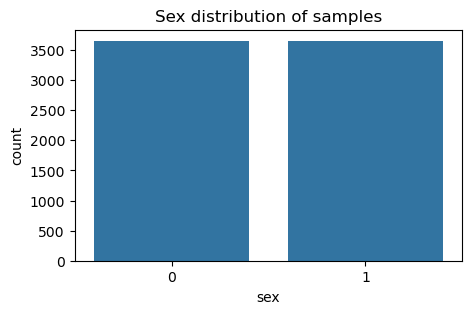

In [665]:
ax= plt.figure(figsize = (5,3))
print(train_data.sex.value_counts())
sns.countplot(data = train_data, x = train_data['sex'])
plt.title('Sex distribution of samples')


Text(0.5, 1.0, 'Distribution of age_group with respect to target')

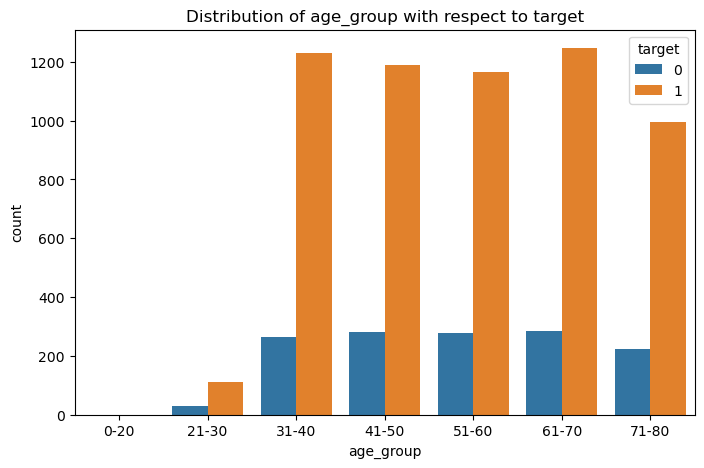

In [667]:
plt.figure(figsize = (8,5))
sns.countplot(data = train_data, x = 'age_group', hue = 'target')
plt.title('Distribution of age_group with respect to target')

In [669]:
train_data.thal.value_counts()

thal
1    1879
3    1822
2    1813
0    1789
Name: count, dtype: int64

In [671]:
train_data.target.value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

In [673]:
df = train_data.select_dtypes(exclude = 'category')

### CHECKING FOR CORRELATION

In [675]:
correlation = df.corr(method = 'pearson')

<Axes: >

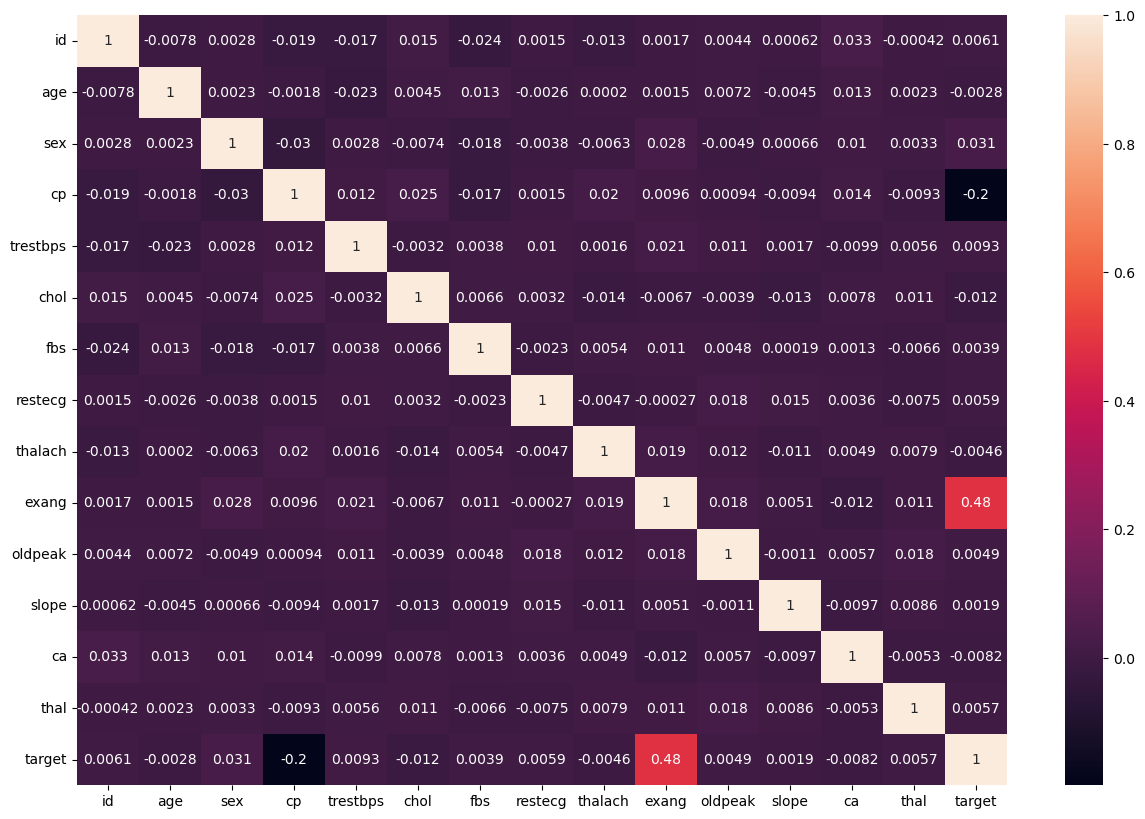

In [677]:
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True)

## There is no stong correlation among the features

###### The dataset is imbalanced. SMOTE will be performed to complement this.

##### *CHECK FOR NORMAL DISTRIBUTION IN THESE FEATURES 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'*

Text(0.5, 1.0, 'thalach')

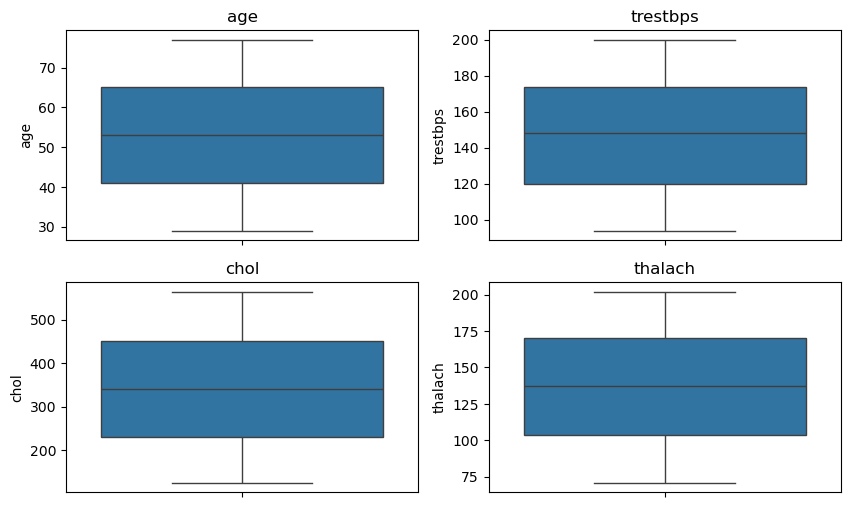

In [680]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.boxplot(train_data.age)
plt.title('age')


plt.subplot(2,2,2)
sns.boxplot(train_data.trestbps)
plt.title('trestbps')


plt.subplot(2,2,3)
sns.boxplot(train_data.chol)
plt.title('chol')


plt.subplot(2,2,4)
sns.boxplot(train_data.thalach)
plt.title('thalach')


Text(0.5, 1.0, 'oldpeak')

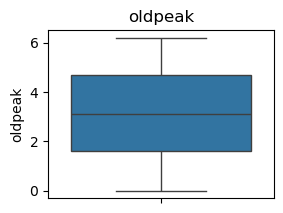

In [682]:
plt.subplot(2,2,1)
sns.boxplot(train_data.oldpeak)
plt.title('oldpeak')

#### These columns have a normal distribution, therefore, the choice of scaling/normalization method to be used will be Standard scaler

In [730]:
X = train_data.drop(['id','target', 'age_group'], axis = 1)
y = train_data.target

In [732]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,30,1,2,107,177,1,2,119,0,2.7,1,0,0
7299,42,1,2,96,551,1,2,76,0,1.9,2,3,2
7300,51,1,0,151,165,1,0,190,1,0.9,0,0,2
7301,29,0,0,195,287,1,2,161,1,3.4,1,1,0


In [733]:
y

0       1
1       0
2       1
3       1
4       1
       ..
7298    0
7299    1
7300    1
7301    1
7302    1
Name: target, Length: 7303, dtype: int64

### PERFORM SCALING 

In [735]:
from sklearn.preprocessing import StandardScaler

In [736]:
#scale = StandardScaler()
scale = StandardScaler()

In [737]:
X_scale = scale.fit_transform(X)

In [738]:
X_scale

array([[-1.42211281, -0.99931558, -0.45049331, ...,  0.01038828,
         1.40449313, -0.45124175],
       [-0.01217263,  1.00068488,  0.44595155, ...,  1.23402692,
        -0.72248827, -1.34966555],
       [-1.14012478,  1.00068488,  0.44595155, ...,  0.01038828,
         0.69549933, -0.45124175],
       ...,
       [-0.15316665,  1.00068488, -1.34693818, ..., -1.21325037,
        -1.43148208,  0.44718205],
       [-1.70410085, -0.99931558, -1.34693818, ...,  0.01038828,
        -0.72248827, -1.34966555],
       [-1.06962777, -0.99931558, -1.34693818, ...,  0.01038828,
         1.40449313,  1.34560585]])

PUT THE SCALED DATA BACK IN DATAFRAME

In [740]:
scaled_data = pd.DataFrame(X_scale, columns = X.columns)

In [741]:
scaled_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.422113,-0.999316,-0.450493,0.339337,-1.082671,1.013927,-1.241813,0.458684,-1.006457,-0.910004,0.010388,1.404493,-0.451242
1,-0.012173,1.000685,0.445952,1.625618,-1.483352,-0.986264,-0.015946,-0.852298,-1.006457,-1.300839,1.234027,-0.722488,-1.349666
2,-1.140125,1.000685,0.445952,-1.493613,-1.106241,1.013927,-1.241813,0.484904,-1.006457,-0.575002,0.010388,0.695499,-0.451242
3,1.538762,-0.999316,-1.346938,-1.107729,-0.289166,1.013927,1.209920,-1.271812,0.993585,0.988337,-1.213250,-0.013494,0.447182
4,-1.281119,1.000685,0.445952,-0.271646,0.598618,1.013927,-0.015946,0.773320,0.993585,-1.245005,1.234027,1.404493,-1.349666


### PERFORM SMOTE TO BALANCE THE DATASET CLASS

In [743]:
from imblearn.over_sampling import SMOTE

In [744]:
smote = SMOTE(sampling_strategy='minority')

In [745]:
X_sm, y_sm = smote.fit_resample(scaled_data, y)

In [746]:
y_sm.value_counts()

target
1    5941
0    5941
Name: count, dtype: int64

In [747]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state = 40)

### USING RANDOMFOREST

In [750]:
from sklearn.ensemble import RandomForestClassifier

In [751]:
rf_clf = RandomForestClassifier(random_state=40)

In [752]:
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [6,8]    
}

In [753]:
rand_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=40), param_grid, cv=5, random_state=40)

In [754]:
rand_search_rf.fit(X_train, y_train)

C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
                   param_distributions={'max_depth': [6, 8],
                                        'n_estimators': [20, 50, 100]},
                   random_state=40)

In [755]:
rand_search_rf.best_estimator_

RandomForestClassifier(max_depth=8, random_state=40)

In [756]:
best_rf_model = rand_search_rf.best_estimator_

In [757]:
best_rf_model.score(X_train, y_train)

0.8898641337020561

In [758]:
best_rf_model.score(X_test, y_test)

0.8807854137447405

### About a difference of 0.009 in the train score and test score

## USING ADABOOST

In [761]:
from sklearn.ensemble import AdaBoostClassifier as ada

In [762]:
param_grid_ad = {
    'n_estimators': [20, 40, 60, 80, 90],
    'learning_rate': [0.001, 0.002, 0.05,]
} 

In [763]:
rand_search_ad = RandomizedSearchCV(ada(random_state = 40), param_grid_ad, cv=5, random_state=40)

In [764]:
rand_search_ad.fit(X_train, y_train)

C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\EDEH\an

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=40),
                   param_distributions={'learning_rate': [0.001, 0.002, 0.05],
                                        'n_estimators': [20, 40, 60, 80, 90]},
                   random_state=40)

In [765]:
rand_search_ad.best_estimator_

AdaBoostClassifier(learning_rate=0.05, n_estimators=60, random_state=40)

In [766]:
rand_search_ad.score(X_train, y_train)

0.884934471564266

In [767]:
rand_search_ad.score(X_test, y_test)

0.8802244039270687

### About a difference of 0.004 in the train score and test score

### USING SVM

In [770]:
from sklearn.svm import SVC

In [771]:
para_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'degree' : [0,1,2],
    'C': [1, 1.5, 2],
    'gamma':['scale', 'auto']
}

In [772]:
rand_search_svm = RandomizedSearchCV(SVC(random_state= 40), para_grid_svm, cv = 5, random_state = 40)

In [773]:
rand_search_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=40),
                   param_distributions={'C': [1, 1.5, 2], 'degree': [0, 1, 2],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=40)

In [774]:
rand_search_svm.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 2}

In [775]:
rand_search_svm.score(X_train, y_train)

0.9030900565107611

In [776]:
rand_search_svm.score(X_test, y_test)

0.8861150070126227

### About a difference of 0.013 in the train score and test score

## USING XGBOOST

In [779]:
import xgboost

In [780]:
from xgboost import XGBClassifier

#### hyper parameter tuning

In [782]:
param_grid_xg = {
    'n_estimators': [10,15,10],
    'max_depth': [1,2,3],
    'learning_rate': [0.001, 0.002, 0.003, 0.004],
    'lambda': [0.4, 0.5, 1, 2]
}


In [783]:
rand_search_xg = RandomizedSearchCV(XGBClassifier(random_state = 40), param_grid_xg, cv=5, random_state=40)

In [784]:
rand_search_xg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=40, ...),
                   param_distributions={'lambda': [0.4, 0.5, 1, 2],
                                        'learning_rate': [0.001, 0.002, 0.003,
                                                          0.004],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [10, 15, 10]},
                   random_state=40)

In [785]:
rand_search_xg.best_params_

{'n_estimators': 15, 'max_depth': 2, 'learning_rate': 0.003, 'lambda': 2}

In [786]:
rand_search_xg.score(X_train, y_train)

0.884934471564266

In [787]:
rand_search_xg.score(X_test, y_test)

0.8802244039270687

### About a difference of 0.004 in the train score and test score

## USING LOGISTIC REGRESSION

In [790]:
from sklearn.linear_model import LogisticRegression

#### hyper-parameter tuning

In [792]:
param_grid_lr = {
    'C': [ 25, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
             }


In [793]:
rand_search_lr = RandomizedSearchCV(LogisticRegression(random_state = 40), param_grid_lr, cv=5, random_state=40)

In [794]:
rand_search_lr.fit(X_train, y_train)

C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\EDEH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _chec

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=40),
                   param_distributions={'C': [25, 50, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=40)

In [795]:
rand_search_lr.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 100}

In [796]:
lr_model = rand_search_lr.best_estimator_

In [797]:
lr_model.score(X_train, y_train)

0.884934471564266

In [798]:
lr_model.score(X_test, y_test)

0.8802244039270687

#### About a difference of 0.004 in the train score and test score

### Adaboost and XGboost have same accuracy scores. The boost algorithms are prone to overfitting, hence logistic regression will be more suitable for this classification task.

#### This is the best possible score that could be achieved. In order to improve this score, the model needs to be trained on more samples

CONFUSION MATRIX VISUALIZATION

In [802]:
y_predict = lr_model.predict(X_test)

In [803]:
from sklearn.metrics import confusion_matrix

In [804]:
cm = confusion_matrix(y_test, y_predict)

In [805]:
cm

array([[1796,    0],
       [ 427, 1342]], dtype=int64)

## PREDICTING THE TEST DATASET

In [807]:
test_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [816]:
#scale the test data
scaled_test_data = scale.fit_transform(test_data)

In [836]:
df_test = pd.DataFrame(scaled_test_data, columns = test_data.columns)

In [838]:
df_test = df_test.drop('id', axis = 1)

In [840]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.180311,1.022879,-1.352098,0.542359,1.186502,-0.994454,1.206332,0.885296,1.031263,-0.631450,-0.014106,-1.454633,-0.422556
1,0.553060,1.022879,-1.352098,-0.502201,-0.833280,-0.994454,1.206332,-1.613872,1.031263,0.971054,1.213152,-0.023089,0.469874
2,-0.004496,1.022879,-1.352098,-1.677331,1.681623,1.005577,-0.026046,-1.639905,1.031263,-1.349814,-0.014106,-0.738861,-1.314986
3,-1.119610,-0.977632,-0.453255,1.031997,-0.448186,-0.994454,-0.026046,1.458022,1.031263,1.413124,-0.014106,-1.454633,-1.314986
4,-1.258999,-0.977632,1.344433,-1.383549,-0.495340,-0.994454,-1.258424,-0.364288,-0.969684,-1.018261,-0.014106,1.408454,1.362304


In [842]:
test_predict = lr_model.predict(df_test)

In [844]:
test_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

### SUBMISSION FILE

In [854]:
subm_sample.head()

,id,target
0,37677,NaN
1,27603,NaN
2,66786,NaN
3,45438,NaN
4,73200,NaN


In [878]:
submission_file = pd.DataFrame({'id': test_data.id, 'target': test_predict})

In [880]:
submission_file

,id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
...,...,...
2692,14964,0
2693,16774,1
2694,18884,1
2695,10000,1


In [884]:
submission_file.to_csv('heart_disease_detection.csv', index = False)